In [54]:
import pandas as pd

from mainnet_launch.pages.expected_vs_actual_returns.expected_vs_actual_returns import (
    build_CR_out_vs_gross_and_net_performance_df,
)
from mainnet_launch.constants import ALL_AUTOPOOLS


cols = [
    "Rolling Average CR Out",
    "Annualized Change In Price Return",
    "Net Return",
    "Gross + Price Return",
    "Gross Return",
    "autopool",
]
dfs = []
for a in ALL_AUTOPOOLS:
    df = build_CR_out_vs_gross_and_net_performance_df(a, 30)
    df.rename(
        columns={
            f"adjusted_{30}_days_annualized_apr": "Gross Return",
            f"actual_{30}_days_annualized_apr": "Net Return",
            "annualized_change_in_price_return": "Annualized Change In Price Return",
            f"avg_cr_out_prior_{30}_days": "Rolling Average CR Out",
        },
        inplace=True,
    )
    # df = df[df.index > "10-29-2024"]

    df["autopool"] = a.name
    dfs.append(df)


df = pd.concat(dfs)
df[cols]

,Rolling Average CR Out,Annualized Change In Price Return,Net Return,Gross + Price Return,Gross Return,autopool
timestamp,,,,,,
2024-10-15 00:00:00+00:00,5.422321,0.134317,1.645459,4.659747,4.525430,autoETH
2024-10-16 00:00:00+00:00,5.638364,0.321373,1.655130,5.013130,4.691758,autoETH
2024-10-17 00:00:00+00:00,5.834676,0.485399,1.671142,5.395618,4.910219,autoETH
2024-10-18 00:00:00+00:00,5.998010,0.525368,1.803258,5.673754,5.148387,autoETH
2024-10-19 00:00:00+00:00,6.133735,0.315890,2.137643,5.672285,5.356395,autoETH
...,...,...,...,...,...,...
2025-01-23 00:00:00+00:00,5.758812,2.317326,3.236090,6.560777,4.243451,baseETH
2025-01-24 00:00:00+00:00,5.731644,2.234656,2.599584,5.868896,3.634240,baseETH
2025-01-25 00:00:00+00:00,5.710168,2.564050,2.562568,6.160364,3.596314,baseETH


In [55]:
df["diff"] = df["Gross + Price Return"] - df["Rolling Average CR Out"]
df[df["autopool"] == "balETH"].sort_values("diff").head()["diff"]

timestamp
2024-11-08 00:00:00+00:00   -1.531678
2024-11-02 00:00:00+00:00   -1.422114
2024-10-28 00:00:00+00:00   -1.350443
2024-11-05 00:00:00+00:00   -1.313811
2024-10-31 00:00:00+00:00   -1.286141
Name: diff, dtype: float64

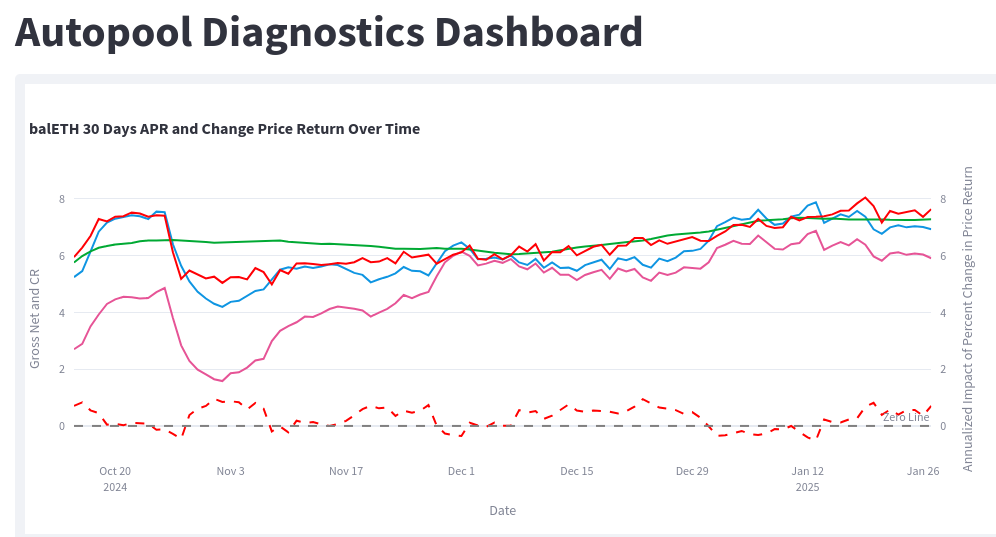

For bal ETH the over performance at the start comes from donating to the pool. that sharp line up

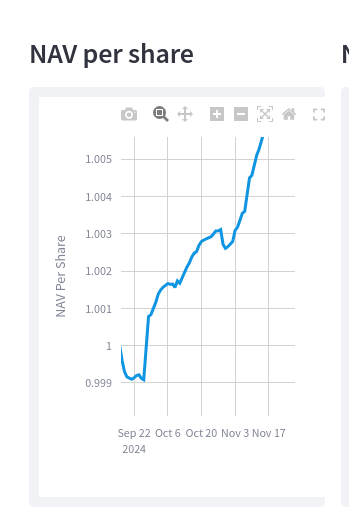


I think the under performance in the period after

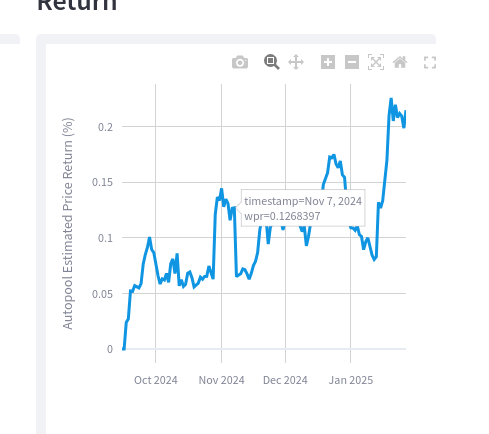


maybe, the increase in price return does not fully change it?

Maybe some incentive APR broke our way, 

It could be that we were givng incentive credits to the destination when it had no APR?

-- Do we have an easy way to check this?


Today I am trying to figure out 


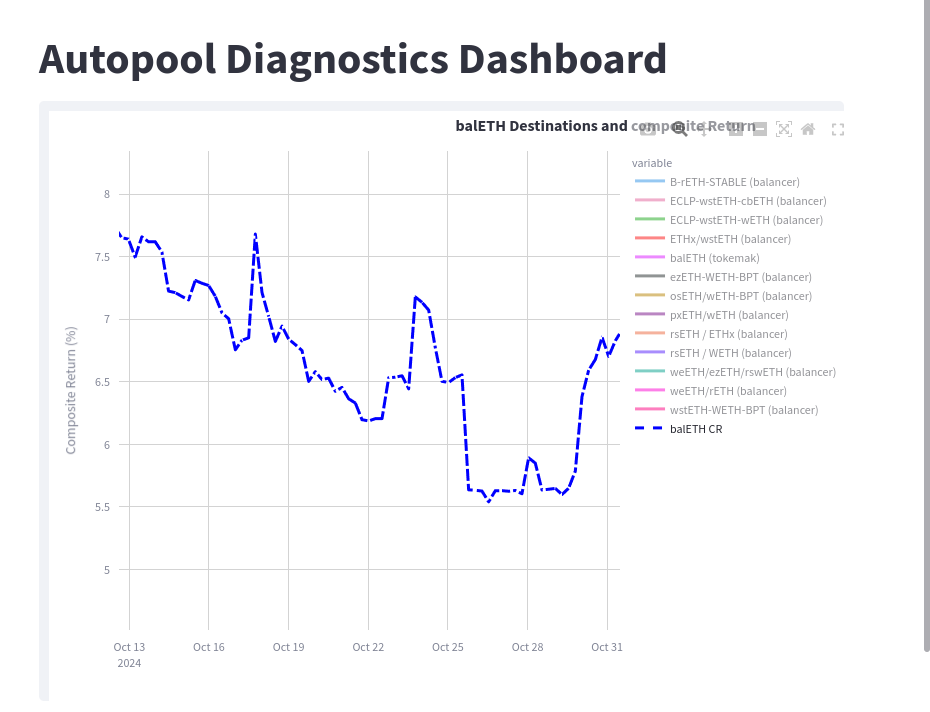

nov 8 the price return dropped by 6 points, so gross should be higher than CR, because the price moved towards us.

nov 2


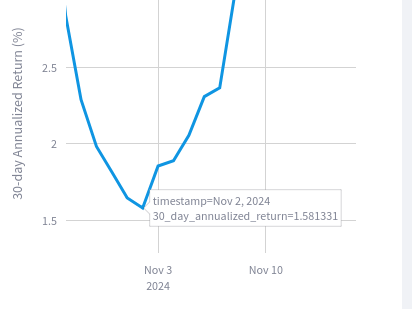
bottom on the 30 rolling net return, 

oct 3, is the 30 days before

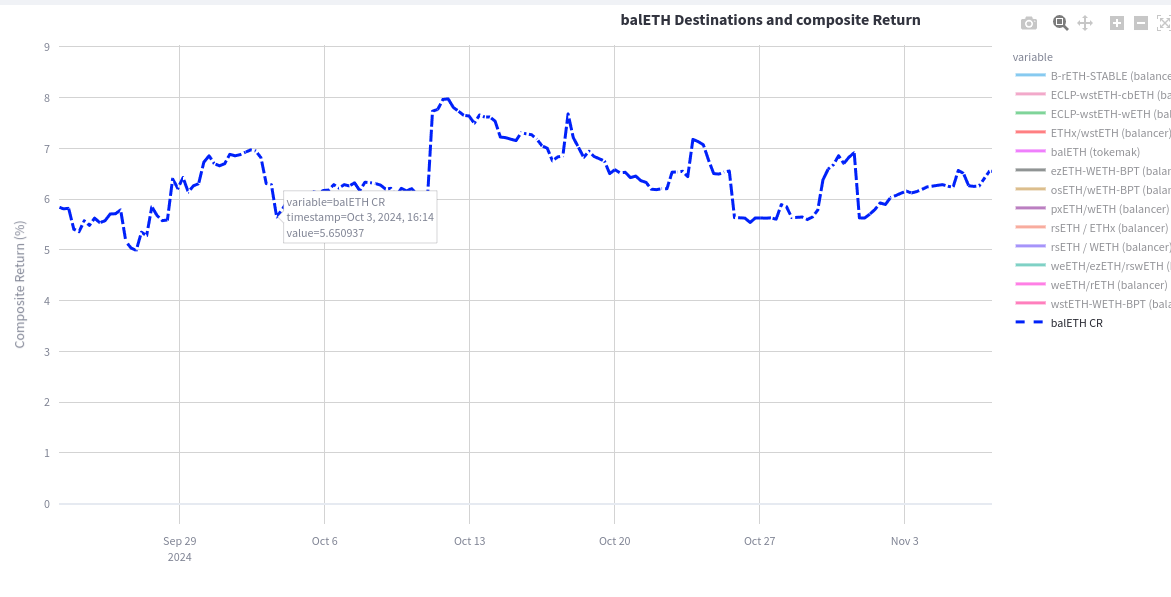

bal ETH CR droppped by 1 percent right before


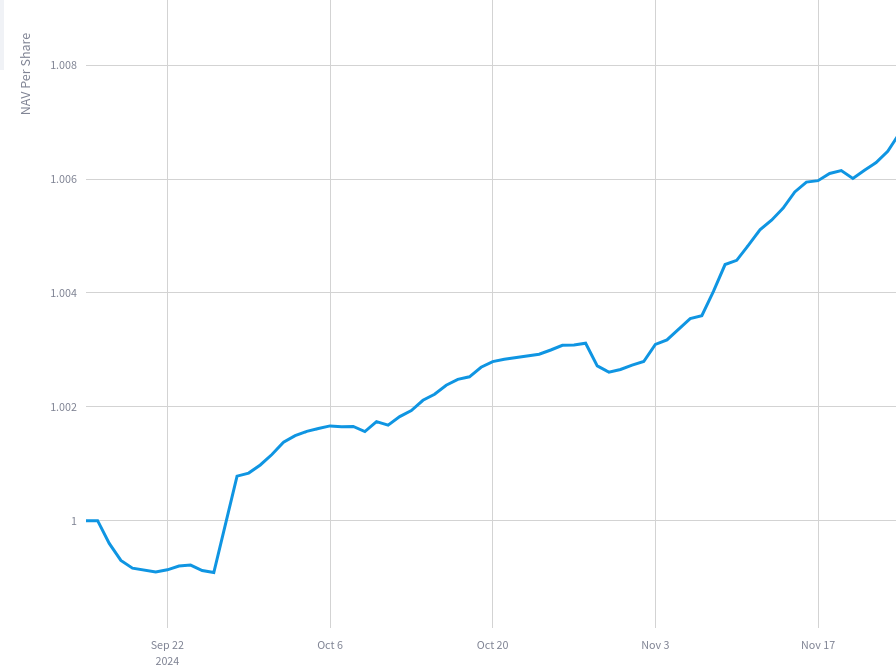

There was a slight dip with depeg, so the net return looked smaller.


In [56]:
df[df["autopool"] == "balETH"].sort_values("diff").tail()

,autoETH CR,30_day_annualized_return,Rolling Average CR Out,adjusted_nav_per_share,actual_nav_per_share,Gross Return,Net Return,diff_between_rolling_weighted_CR_and_adjusted,diff_between_rolling_weighted_CR_and_actual,autopool_price_return,change_in_price_return,Annualized Change In Price Return,Gross + Price Return,autopool,balETH CR,autoLRT CR,baseETH CR,diff
timestamp,,,,,,,,,,,,,,,,,,
2024-10-21 00:00:00+00:00,NaN,4.548973,6.420740,1.005148,1.002834,7.366508,4.548973,0.945769,-1.871766,0.059273,0.002247,0.027334,7.393842,balETH,6.197316,NaN,NaN,0.973102
2024-10-23 00:00:00+00:00,NaN,4.488507,6.507429,1.005271,1.002887,7.391374,4.488507,0.883945,-2.018922,0.062734,0.007761,0.094421,7.485795,balETH,7.178080,NaN,NaN,0.978366
2024-10-20 00:00:00+00:00,NaN,4.462101,6.396371,1.005128,1.002794,7.303976,4.462101,0.907606,-1.934270,0.057850,0.005929,0.072141,7.376117,balETH,6.423901,NaN,NaN,0.979747
2024-10-18 00:00:00+00:00,NaN,3.927406,6.277650,1.004923,1.002527,6.845379,3.927406,0.567729,-2.350244,0.064078,0.036847,0.448308,7.293687,balETH,6.944747,NaN,NaN,1.016037
2024-10-22 00:00:00+00:00,NaN,4.539227,6.448469,1.005230,1.002863,7.421704,4.539227,0.973235,-1.909242,0.064510,0.008499,0.103402,7.525105,balETH,6.532448,NaN,NaN,1.076636


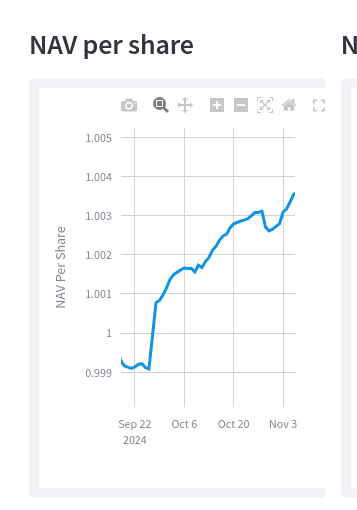

We donated to the pool to bring the nav per share. This made the gross return > the composite return 

In [57]:
# The reasons 30 days after

In [74]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = None

import plotly.graph_objects as go


def make_scatterplot(df, x_col, y_col):
    # Create the scatter plot
    fig = px.scatter(
        df,
        x=x_col,
        y=y_col,
        color="autopool",
        hover_data={"index": df.index},
        title="30 day CR out vs Gross + Price Return",
    )

    # Update the axes range to be between 0 and 10
    fig.update_layout(xaxis=dict(range=[0, 10]), yaxis=dict(range=[0, 10]))

    # Add a diagonal line x = y
    fig.add_trace(go.Scatter(x=[0, 10], y=[0, 10], mode="lines", line=dict(color="black", dash="dash"), name="1:1"))

    # Show the plot
    return fig


# get rid of a the missing data,
make_scatterplot(df, "Rolling Average CR Out", "Gross + Price Return").show()

In [59]:
import numpy as np

root_mean_squared_error = np.sqrt(
    np.mean(
        (
            df[df["autopool"] == "balETH"]["Gross + Price Return"]
            - df[df["autopool"] == "balETH"]["Rolling Average CR Out"]
        )
        ** 2
    )
)
root_mean_squared_error

np.float64(0.6072536214176618)

In [75]:
for autopool in ["balETH", "autoETH", "autoLRT"]:
    # Calculate Root Mean Squared Error
    root_mean_squared_error = np.sqrt(
        np.mean(
            (
                df[df["autopool"] == autopool]["Rolling Average CR Out"]
                - df[df["autopool"] == autopool]["Gross + Price Return"]
            )
            ** 2
        )
    )

    # Calculate Correlation
    corr = df[df["autopool"] == autopool][["Rolling Average CR Out", "Gross + Price Return"]].corr().values[0, 1]

    # Calculate Mean Absolute Deviation (MAD)
    mad = np.mean(
        np.abs(
            df[df["autopool"] == autopool]["Rolling Average CR Out"]
            - df[df["autopool"] == autopool]["Gross + Price Return"]
        )
    )

    # Print Results
    print(f"Root Mean Squared Error: {root_mean_squared_error}, Correlation: {corr}, MAD: {mad}, Autopool: {autopool}")

print(df.index.min())

Root Mean Squared Error: 0.6072536214176618, Correlation: 0.6734223910923852, MAD: 0.4592022269779967, Autopool: balETH
Root Mean Squared Error: 0.5763806021574792, Correlation: 0.9525840597781101, MAD: 0.4647691253646756, Autopool: autoETH
Root Mean Squared Error: 1.2788085815703853, Correlation: 0.8790374126916494, MAD: 1.1699252479540914, Autopool: autoLRT
2024-10-15 00:00:00+00:00


In [61]:
import numpy as np


root_mean_squared_error = np.sqrt(
    np.mean(
        (
            df[df["autopool"] == "Gross + Price Return"]["Rolling Average CR Out"]
            - df[df["autopool"] == "balETH"]["Rolling Average CR Out"]
        )
        ** 2
    )
)
root_mean_squared_error

np.float64(nan)

In [62]:
# 11 -8, 10 - 22, 10 - 18, 10 -25, 11-02

In [63]:
df.index.min()

Timestamp('2024-10-15 00:00:00+0000', tz='UTC')

In [64]:
df[df["autopool"] == "autoETH"][["Rolling Average CR Out", "Gross + Price Return"]].corr()
# remove outliers from baseETH, figure out why on balETH, why extreme points

,Rolling Average CR Out,Gross + Price Return
Rolling Average CR Out,1.000000,0.952584
Gross + Price Return,0.952584,1.000000


In [65]:
df[df["autopool"] == "balETH"][["Rolling Average CR Out", "Gross + Price Return"]].corr()

,Rolling Average CR Out,Gross + Price Return
Rolling Average CR Out,1.000000,0.673422
Gross + Price Return,0.673422,1.000000


In [66]:
df[df["autopool"] == "autoLRT"][["Rolling Average CR Out", "Gross + Price Return"]].corr()

,Rolling Average CR Out,Gross + Price Return
Rolling Average CR Out,1.000000,0.879037
Gross + Price Return,0.879037,1.000000


In [67]:
make_scatterplot(df, "Rolling Average CR Out", "Gross + Price Return").show()  # figure out why there is so much dip

Why is base like that?


In [68]:
from mainnet_launch.pages.incentive_token_prices.incentive_token_liqudiation_prices import (
    _get_only_some_incentive_tokens_prices,
    ALL_CHAINS,
)
from mainnet_launch.data_fetching.add_info_to_dataframes import add_timestamp_to_df_with_block_column

from datetime import datetime, timezone, timedelta

today = datetime.now(timezone.utc)
thirty_days_ago = today - timedelta(days=30)
year_ago = today - timedelta(days=365)

# acheived == buy over sell quantity

# ach =
# .0001162 = .065661 / X
# X * .0001162 = .065661
# X = .065661 /  .0001162

incentive_token_df = _get_only_some_incentive_tokens_prices(ALL_CHAINS[0], year_ago).set_index("timestamp")
incentive_token_df

,block,sellTokenAddress,achieved_price,normalized_sell_amount,normalized_buy_amount,oracle_price,incentive_calculator_price,tokenSymbol,chain,incentive percent diff to achieved,oracle percent diff to achieved
timestamp,,,,,,,,,,,
2024-09-19 19:06:47+00:00,20786622,0xC0c293ce456fF0ED870ADd98a0828Dd4d2903DBF,0.000162,405.885565,0.065661,0.000164,0.000172,AURA,eth,5.905974,1.484707
2024-09-19 19:06:47+00:00,20786622,0xba100000625a3754423978a60c9317c58a424e3D,0.000753,97.656862,0.073584,0.000778,0.000775,BAL,eth,2.768548,3.135906
2024-09-19 19:06:47+00:00,20786622,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000404,305.110013,0.123151,0.000403,0.000419,USDC,eth,3.722417,-0.126957
2024-09-19 19:06:47+00:00,20786622,0x4e3FBD56CD56c3e72c1403e103b45Db9da5B9D2B,0.000846,6.322527,0.005347,0.000843,0.000852,CVX,eth,0.743179,-0.342306
2024-09-19 19:06:47+00:00,20786622,0xD533a949740bb3306d119CC777fa900bA034cd52,0.000115,2107.509144,0.241327,0.000115,0.000116,CRV,eth,1.150033,0.475829
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27 03:07:35+00:00,21713067,0xba100000625a3754423978a60c9317c58a424e3D,0.000755,210.190557,0.158694,0.000758,0.000772,BAL,eth,2.199226,0.443491
2025-01-27 03:07:35+00:00,21713067,0x6DF0E641FC9847c0c6Fde39bE6253045440c14d3,0.000032,30004.063009,0.964463,0.000033,0.000033,DINERO,eth,2.696231,1.306728
2025-01-27 03:07:35+00:00,21713067,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000315,760.484015,0.239211,0.000315,0.000303,USDC,eth,-3.763736,0.199511


In [69]:
incentive_token_df["expected_eth"] = (
    incentive_token_df["normalized_sell_amount"] * incentive_token_df["incentive_calculator_price"]
)
incentive_token_df["expected-actual eth earned from incentives"] = (
    incentive_token_df["expected_eth"] - incentive_token_df["normalized_buy_amount"]
)
px.bar(incentive_token_df.resample("1d")["expected-actual eth earned from incentives"].sum())

In [70]:
px.line(incentive_token_df[["expected_eth", "normalized_buy_amount"]].cumsum())

on balETH the drop of over performacen vs under perforance happens, right after the donation runs out. So maybe it was under performing hte whole time? 



In [71]:
100 * incentive_token_df["expected-actual eth earned from incentives"].sum() / incentive_token_df[
    "normalized_buy_amount"
].sum()

# we have been selling reward tokens for about 4.5% less than what the incentive calculators think they are worth at that point.
# note that is not when we moved into that location.

np.float64(-4.5606874998215545)

In [72]:
incentive_token_df["sell_quantity"] = incentive_token_df.apply(
    lambda x: x["weth_received"] / x["achieved_price"], axis=1
)
incentive_token_df["expected_eth"] = (
    incentive_token_df["incentive_calculator_price"] * incentive_token_df["sell_quantity"]
)
incentive_token_df["eth_diff"] = incentive_token_df["expected_eth"] - incentive_token_df["weth_received"]
px.line(incentive_token_df["eth_diff"])

KeyError: 'weth_received'

In [ ]:
incentive_token_df["diff_from_expected_eth"] = (
    incentive_token_df["incentive percent diff to achieved"] / 100 * incentive_token_df["weth_received"]
)

px.bar(incentive_token_df.resample("1D")["diff_from_expected_eth"].sum())

KeyError: 'weth_received'

In [ ]:
incentive_token_df["sellAmount"]

In [ ]:
px.histogram()

In [ ]:
0.065661 / 0.0001162